### 1. Introdução
https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/notebook

### 2. Preparação dos Dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# pd.options.display.max_rows = None
# pd.options.display.max_columns = None

_debug = True

In [2]:
# Leitura dos dados em um Data frame
df = pd.read_csv('Churn_Modelling.csv', delimiter=',')
df.shape

(10000, 14)

In [3]:
# Vefifica a lista de colunas e valores
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Retirando colunas sem necessidade

In [4]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Análise dos dados:
Com base no exposto acima, algumas questões persistem:
- Os dados parecem ser um instantâneo em um determinado momento no tempo, por exemplo, o saldo é para uma determinada data, o que gera várias perguntas:
    - Qual é a data e qual é a relevância dessa data?
    - Seria possível obter saldos ao longo de um período de tempo em vez de uma única data?
- Existem clientes que saíram, mas ainda possuem saldo em suas contas! O que isso poderia significar? Eles poderiam ter saído de um produto, mas não do banco?
- O que significa ser um membro ativo e existem diferentes graus disso? Seria melhor fornecer a contagem de transações em termos de créditos e débitos na conta?
- Uma análise detalhada dos produtos adquiridos por um cliente poderia fornecer mais informações além da simples contagem de produtos.

In [6]:
# Checando os tipos das variáveis
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Análise Exploratória de Dados (Exploratory Data Analysis, EDA)
O principal interesse no problema é compreender como as variáveis condicionais fornecidas se relacionam com o status da variável categórica *'Exited'*, relativa a retenção de clientes de unidades bancárias.

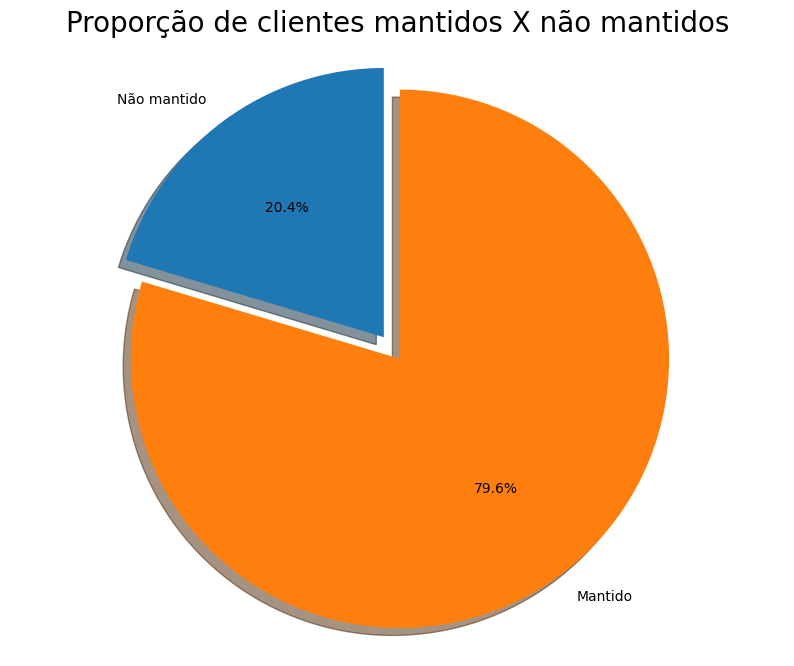

In [7]:
labels = 'Não mantido', 'Mantido'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proporção de clientes mantidos X não mantidos", size = 20)
plt.show()

#### Análise da relação:
Cerca de 20% dos clientes saíram. Portanto, o modelo de referência deverá prever que 20% dos clientes irão sair. Como 20% é um número pequeno, é necessário garantir que o modelo escolhido preveja com grande precisão esses 20%, pois é do interesse do banco identificar e reter esse grupo, em vez de prever com precisão os clientes que são retidos.

<Axes: xlabel='IsActiveMember', ylabel='count'>

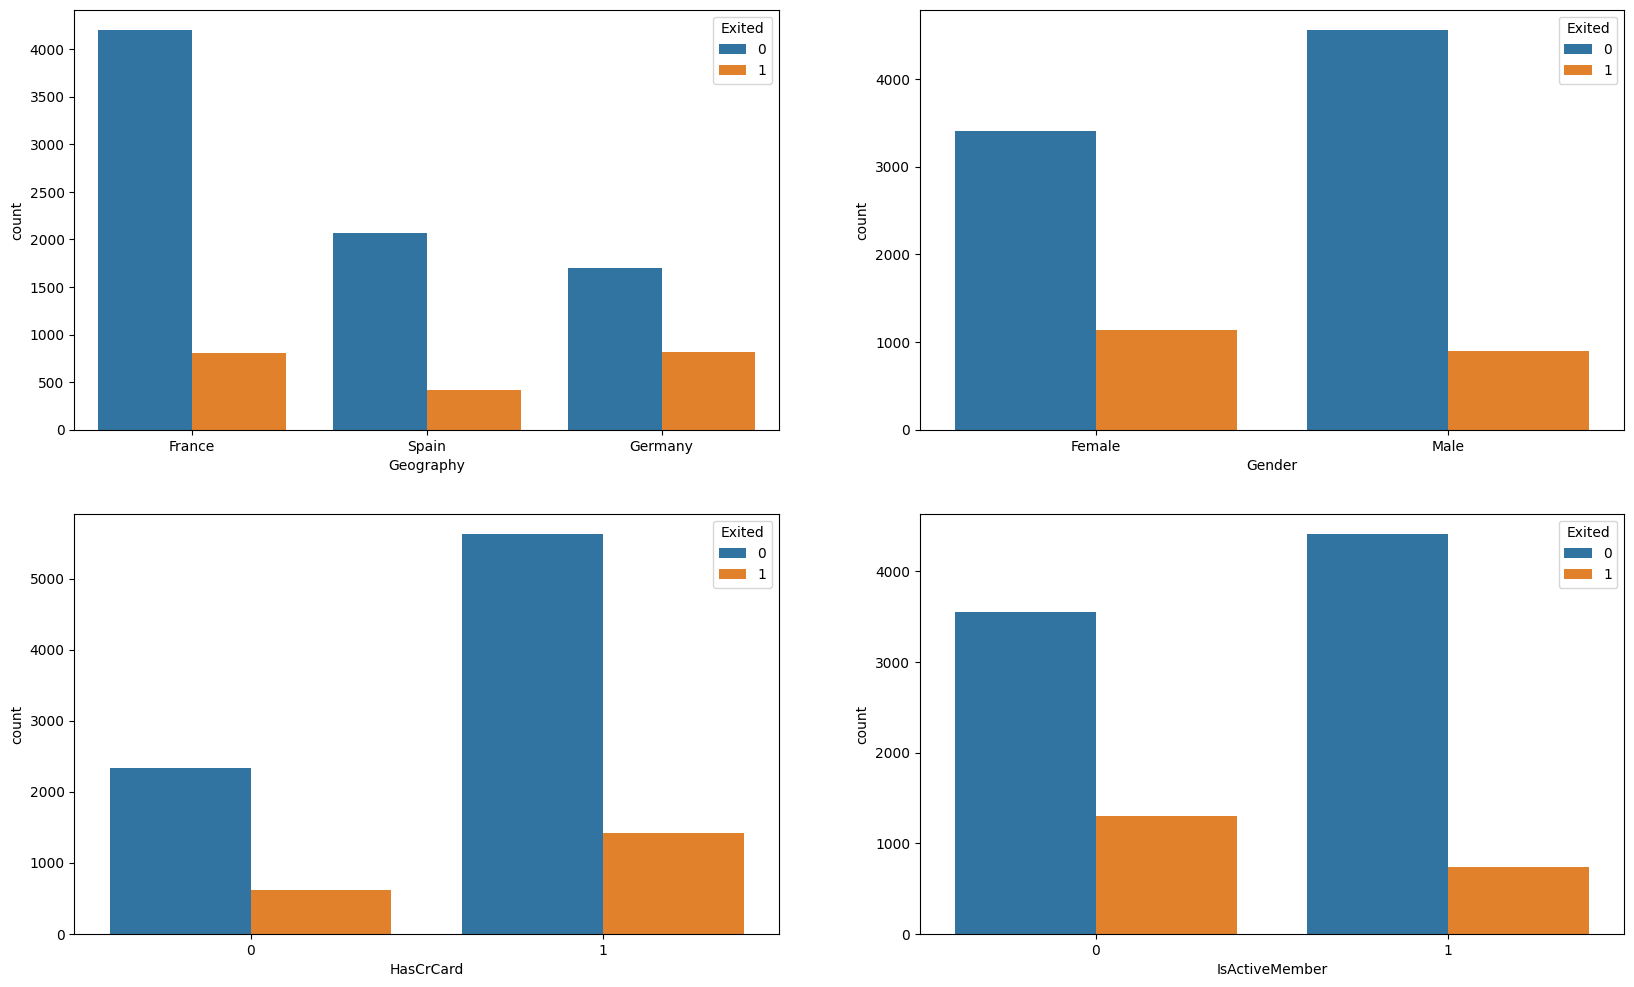

In [8]:
# Revisão da relação entre o atributo "Status" e as variáveis categóricas, que atribuiem categorias.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

#### Análise das relações entre 'status' e as variáveis categóricas:
- A maioria dos dados é de pessoas da França. No entanto, a proporção de clientes que saíram é inversamente relacionada à população de clientes, o que sugere que o banco possa ter um problema (possivelmente falta de recursos de atendimento ao cliente) nas áreas onde tem menos clientes.
- A proporção de clientes do sexo feminino que saíram também é maior do que a dos clientes do sexo masculino.
- A maioria dos clientes que saíram são aqueles com cartões de crédito. Dado que a maioria dos clientes possui cartões de crédito.
- Os membros inativos têm uma taxa de saída maior. Preocupante é que a proporção geral de membros inativos é bastante alta, o que sugere que o banco pode precisar implementar um programa para converter esse grupo em clientes ativos, pois isso certamente terá um impacto positivo na retenção de clientes.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

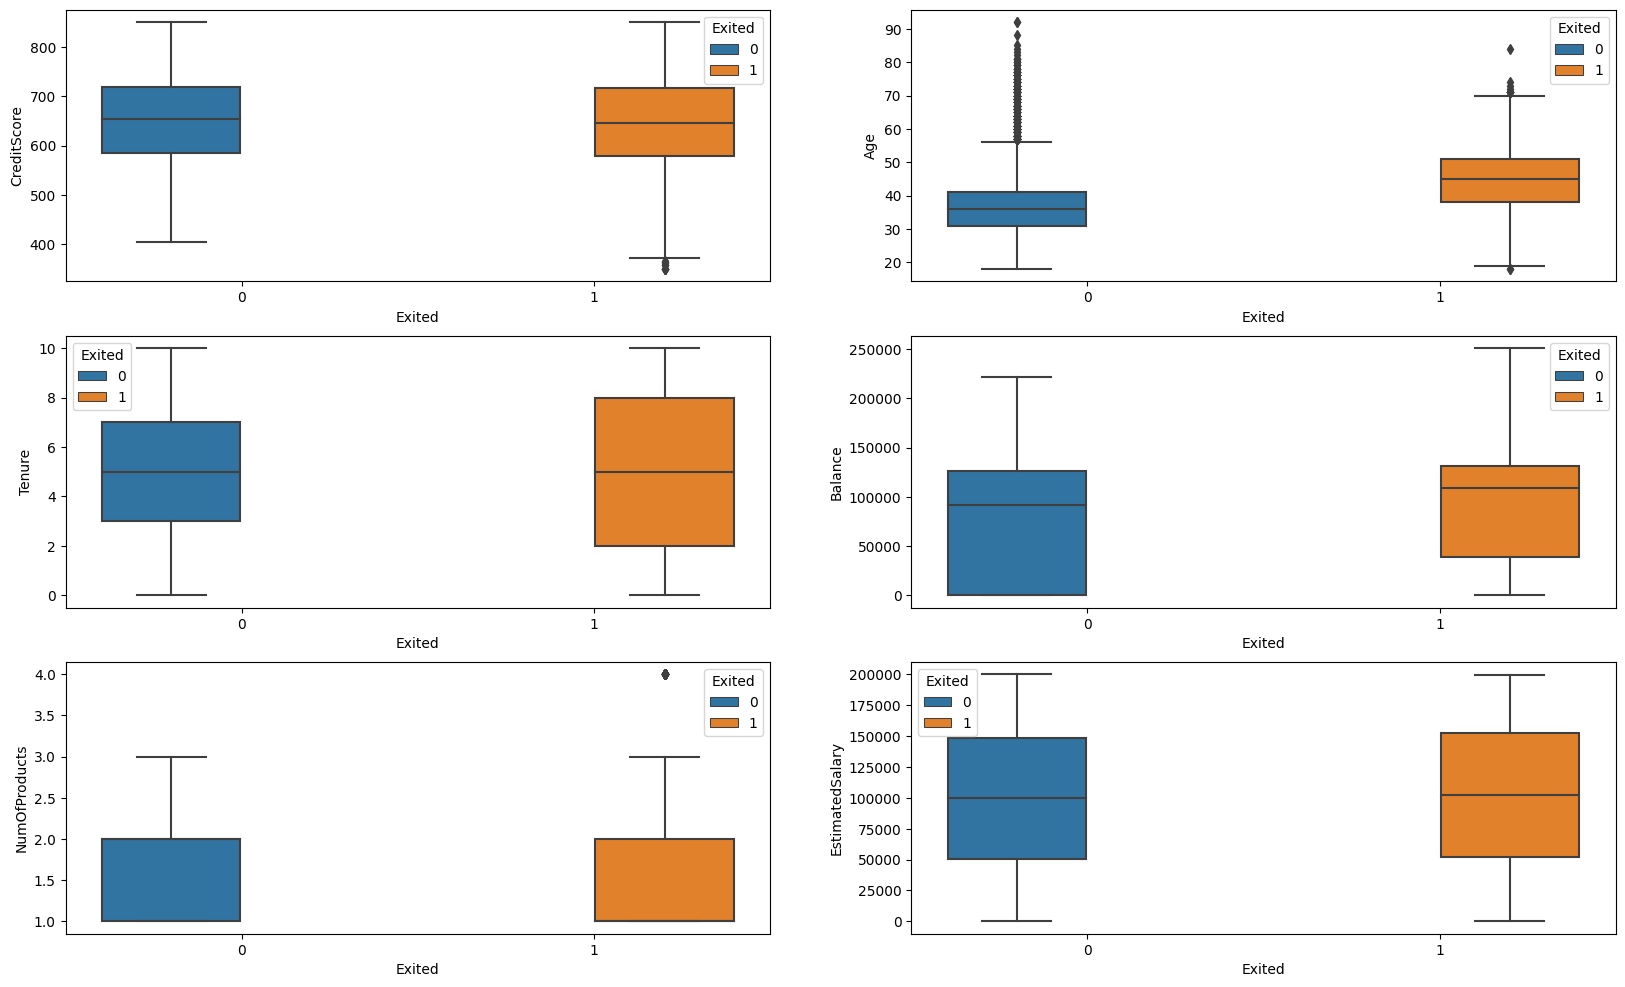

In [9]:
# Revisão da relação entre o atributo "Status" e as variáveis contínuas.
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

#### Análise das relações entre 'status' e as variáveis contínuas:
- Não há diferença significativa na distribuição do score de crédito entre os clientes mantidos e os que saíram.
- Os clientes mais velhos têm uma taxa de saída maior em comparação aos mais jovens, sugerindo uma diferença nas preferências de serviço nas diferentes faixas etárias. O banco pode precisar rever seu mercado-alvo ou sua estratégia de retenção entre os diferentes grupos etários.
- Em relação ao tempo de permanência (tenure), os clientes nos extremos (que passaram pouco tempo ou muito tempo com o banco) têm maior probabilidade de sair em comparação com aqueles que têm um tempo médio de permanência.
- O banco está perdendo clientes com saldos significativos, o que pode afetar seu capital disponível.
- Nem o produto nem o salário têm um efeito significativo na probabilidade de saída.

### 4. Feature engineering
Dividindo a base de treino e teste

In [10]:
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

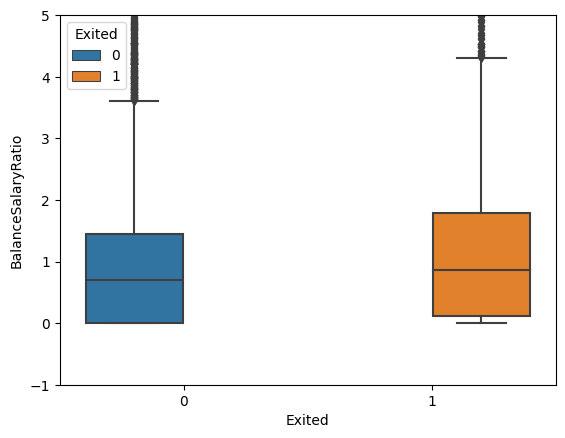

In [11]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

#### Análise da relação da taxa Saldo/Salário e 'Status':
Foi observado anteriormente que o salário tem pouco efeito na probabilidade de um cliente sair. No entanto, como acima, a proporção entre o saldo bancário e o salário estimado indica que os clientes com uma proporção mais alta têm maior probabilidade de sair, o que seria preocupante para o banco, pois isso afeta sua fonte de capital.

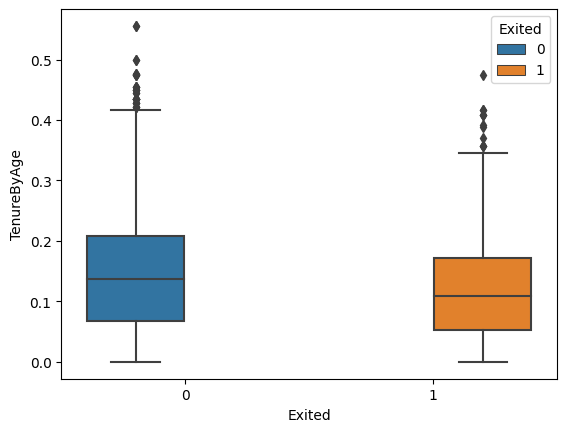

In [12]:
# Foi acrescida uma variável com o objetivo de padronizar o tempo de permanência em relação à idade:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
#plt.ylim(-1, 1)
plt.show()

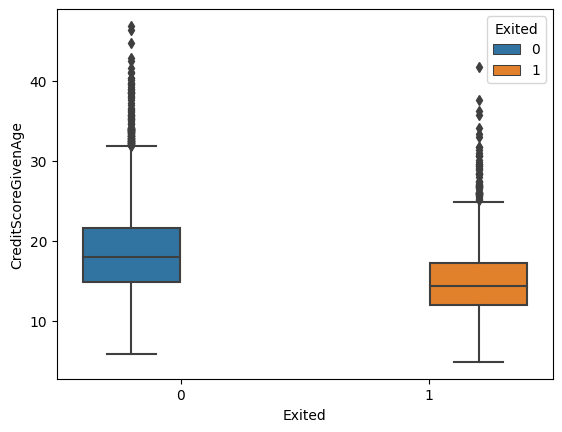

In [13]:
# A última variável inserida tem o objetivo de capturar o score de crédito em relação à idade, 
# a fim de levar em consideração o comportamento de crédito ao longo da vida adulta.
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)
sns.boxplot(y='CreditScoreGivenAge',x = 'Exited', hue = 'Exited',data = df_train)
# plt.ylim(-1, 1)
plt.show()

In [14]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


### 5. Preparando o dado para o Treinamento do Modelo

In [15]:
# Rearranjando as colunas por tipo de dado
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [16]:
# Para as variáveis boolenadas, foi alterado o valor 0 para -1, usando o formato "one-hot"
# para que os modelos possam capturar uma relação negativa 
# quando o atributo for inaplicável, em vez de ser representado como 0.
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [17]:
# usando formato "one-hot" para as demais variáveis categóricas
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == str or df_train[i].dtype == object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [18]:
# Normalizando as variáveis continuas usando a escala minMax
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [19]:
# Função para a preparação do dado de teste
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Novas variáveis
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    # Reordemamento das colunas
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    # Muda de 0 in para -1 nas variáveis categóricas
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One-hot encode para as variáveis categóricas
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Garante que todas as variáveis one-hot que se encontram no vertor de 
    # treino estão no de teste 
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    # Aplicando escala MinMax scaling para variáveis contínuas
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ordena as colunas na mesma ordem do dataframe de teste
    df_predict = df_predict[df_train_Cols]
    return df_predict

### Ajuste e seleção de modelo
Para o ajuste do modelo, serão experimentados:

- Regressão logística no espaço primal e com diferentes kernels
- SVM (Support Vector Machine) no espaço primal e com diferentes kernels
- Modelos de ensemble (conjunto)

In [20]:
# Funções de apoio  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Modelos de Ajuste
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Funções de Pontuação
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#### Encontra melhores parâmetros e scores para avaliação dos modelos
O código que vem a seguir é responsável em rem realizar a busca em grid (*Grid Search*) com validação cruzada (*Cross-Validation*) para encontrar os melhores parâmetros de treinamento para os modelos de regressão logística escolhidos para avaliação das variáveis do problema.

O objetivo é ajustar os modelos aos dados de treinamento e encontrar a melhor configuração de parâmetros que maximize o desempenho dos modelos na previsão da variável de destino `Exited`.

In [21]:
# Funções para recuperar o melhor score do modelo Avaliado
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [22]:
# Regressão logística primal
if not _debug:
    param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
                  'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
    log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
    log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
    best_model(log_primal_Grid)

In [23]:
# Treina a Regreção Logistica with degree 2 polynomial kernel
if not _debug:
    param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
                  'tol':[0.0001,0.000001]}
    poly2 = PolynomialFeatures(degree=2)
    df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
    log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
    log_pol2_Grid.fit(df_train_pol2,df_train.Exited)
    best_model(log_pol2_Grid)

In [24]:
# Treina SVM Com RBF Kernel
if not _debug:
    param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
    SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
    SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
    best_model(SVM_grid)

In [25]:
# Treina SVM com kernel polinomial
if not _debug:
    param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
    SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
    SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
    best_model(SVM_grid)

In [26]:
# Treina Classificador Random Forest
if not _debug:
    param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
    RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
    RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
    best_model(RanFor_grid)

In [27]:
# Treina classificador Extreme Gradient Boosting
if not _debug:
    param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
    xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
    xgb_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
    best_model(xgb_grid)

#### Treinando os modelos

In [28]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

LogisticRegression(C=100, max_iter=250, tol=1e-05)

In [29]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train.Exited)

LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [30]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [31]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [32]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [33]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=1, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, verbosity=0, subsample=1)
XGB.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=7, max_leaves=None, min_child_weight=5, missing=1,
              monotone_constraints=None, n_estimators=20, n_jobs=1,
              nthread=None, num_parallel_tree=None, predictor=None, ...)

#### Revisão da acurácia do melhor modelo: Há um interesse especial no desempenho na previsão dos casos positivos (clientes que cancelam).

In [34]:
# Regressão logística primal
print(classification_report(df_train.Exited, log_primal.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.64      0.24      0.35      1647

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



In [35]:
# Regreção Logistica with degree 2 polynomial kernel
print(classification_report(df_train.Exited,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6353
           1       0.77      0.46      0.57      1647

    accuracy                           0.86      8000
   macro avg       0.82      0.71      0.75      8000
weighted avg       0.85      0.86      0.85      8000



In [36]:
# SVM Com Kernel RBF
print(classification_report(df_train.Exited,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.85      0.40      0.54      1647

    accuracy                           0.86      8000
   macro avg       0.86      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [37]:
# SVM com kernel polinomial
print(classification_report(df_train.Exited,  SVM_POL.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.84      0.38      0.52      1647

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.85      0.86      0.83      8000



In [38]:
# Classificador Random Forest
print(classification_report(df_train.Exited,  RF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6353
           1       0.88      0.52      0.66      1647

    accuracy                           0.89      8000
   macro avg       0.89      0.75      0.80      8000
weighted avg       0.89      0.89      0.88      8000



In [39]:
# Classificador Extreme Gradient Boost 
print(classification_report(df_train.Exited,  XGB.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6353
           1       0.83      0.53      0.65      1647

    accuracy                           0.88      8000
   macro avg       0.86      0.75      0.79      8000
weighted avg       0.88      0.88      0.87      8000



#### Analisando a Curva ROC dos Modelos

In [40]:
y = df_train.Exited
X = df_train.loc[:, df_train.columns != 'Exited']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

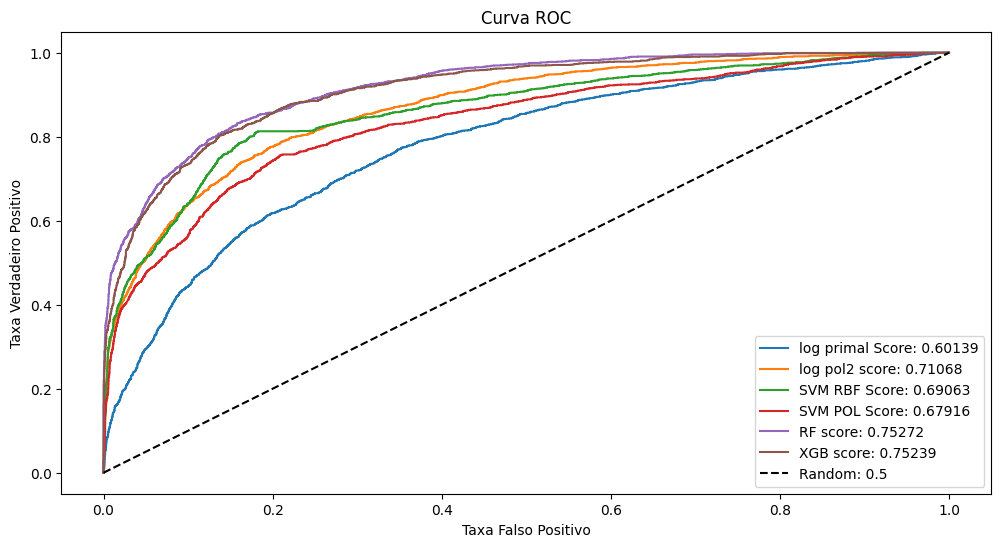

In [41]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('Taxa Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

#### Análise do Gráfico:
A curva ROC (Receiver Operating Characteristic) é uma representação gráfica do desempenho de um modelo de classificação binária. Ela ilustra a relação entre a taxa de verdadeiro positivo (sensibilidade) e a taxa de falso positivo (1 - especificidade) para diferentes limiares de classificação.

A análise da curva ROC é útil para avaliar a capacidade discriminativa do modelo em distinguir entre as classes positiva e negativa. Quanto mais próxima a curva estiver do canto superior esquerdo do gráfico, melhor será o desempenho do modelo. Um modelo ideal teria uma curva ROC que passasse pelo ponto (0,1), indicando uma taxa de verdadeiro positivo de 100% e uma taxa de falso positivo de 0%.

Uma métrica comumente usada para avaliar a qualidade da curva ROC é a AUC (Area Under the Curve), que representa a área sob a curva ROC. Quanto maior a AUC, melhor o desempenho do modelo. Um valor de AUC igual a 0,5 indica um modelo que é equivalente a um classificador aleatório, enquanto um valor de AUC igual a 1 representa um modelo perfeito.

No gráfico acima, apresenta-se a curva ROC dos diferentes modelos foram avaliados. Os rótulos das curvas incluem a pontuação (AUC) de cada modelo. Comparando as curvas e os valores de AUC, é possível ter uma ideia da eficácia relativa de cada modelo. Modelos com maiores valores de AUC tendem a ter um desempenho melhor na classificação.

#### Analisando os resultados encontrados
Com base nos resultados acima, o objetivo principal era prever os clientes que possivelmente cancelariam seus serviços, para que possam ser incluídos em algum tipo de programa para prevenir seu desligameto da unidade bancária. Portanto, as **métricas recall** para os casos identificados como 1 são mais importantes que as **métricas precision**  do modelo.

Considerando que nos dados tem-se apenas 20% de desligamentos, uma **métrica recall** maior do que esse valor já será uma melhoria significativa. Entretanto, quere-se alcançar o maior taxa possível de acertos, ao mesmo tempo em que se mantém uma alta **métrica precision** , para que a unidade bancária possa concentrar seus esfoços no relacionamento dos clientes destacados pelo o melhor modelo treinado, sem desperdiçar seus esforços com falsos positivos.

Isto posto, dada a análise dos modelos ajustados acima, os melhores modelos que oferece um equilíbrio adequado entre as **métricas recall e precision** são o *Random Forest* e o *Extreme Gradient Boost*, com uma ligeria vantagem para o primeiro, onde, de acordo com o ajuste no conjunto de treinamento, com uma *métrica precision* de 0,88 para os casos positivos, de todos os clientes que o modelo prevê que irão cancelar, 88% realmente o fazem, e com uma *métrica recall* de 0,52 para os casos positivos, o modelo consegue destacar 53% de todos os que cancelaram. Já o segundo modelo citado (*XGB score*), tem a *métrica precison* de 0.83 e a *métrica recall* de 0,53.

#### Testando a precisão do Modelo com o data frame de teste

In [42]:
import warnings
warnings.filterwarnings("ignore")
# Realiza o pré-processameto para os dados de teste
df_test = DfPrepPipeline(df_test,df_train.columns,minVec,maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

(1996, 17)

In [43]:
print(classification_report(df_test.Exited,  RF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.79      0.39      0.52       389

    accuracy                           0.86      1996
   macro avg       0.83      0.68      0.72      1996
weighted avg       0.85      0.86      0.84      1996



In [44]:
print(classification_report(df_test.Exited,  XGB.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       389

    accuracy                           0.87      1996
   macro avg       0.82      0.72      0.75      1996
weighted avg       0.86      0.87      0.85      1996



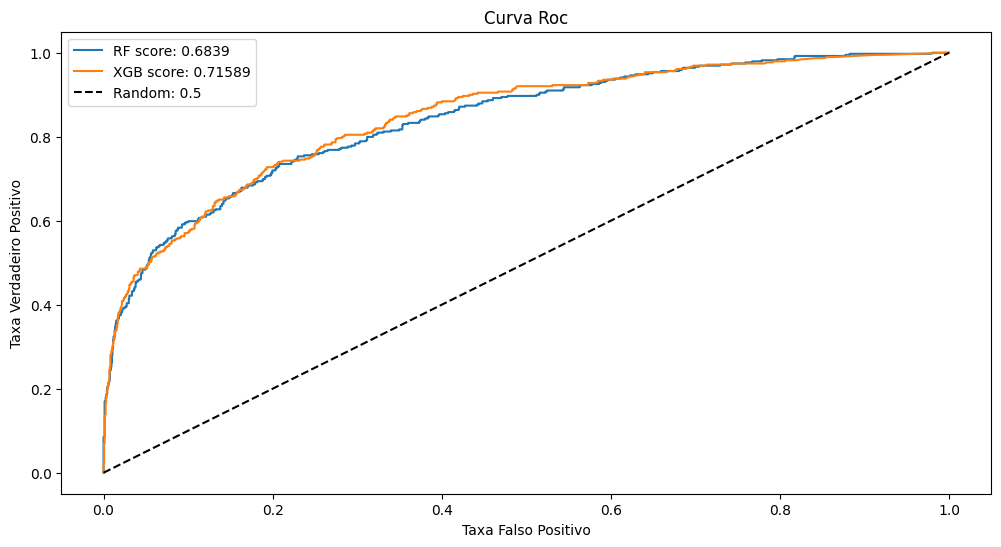

In [47]:
auc_RF_test, fpr_RF_test, tpr_RF_test    = get_auc_scores(df_test.Exited, RF.predict(df_test.loc[:, df_test.columns != 'Exited']),
                                                          RF.predict_proba(df_test.loc[:, df_test.columns != 'Exited'])[:,1])
auc_XGB_test, fpr_XGB_test, tpr_XGB_test = get_auc_scores(df_test.Exited, XGB.predict(df_test.loc[:, df_test.columns != 'Exited']),
                                                          XGB.predict_proba(df_test.loc[:, df_test.columns != 'Exited'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot(fpr_XGB_test, tpr_XGB_test, label = 'XGB score: ' + str(round(auc_XGB_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('Taxa Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')
plt.title('Curva Roc')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()